# EDA - Exploratory Data Analysis

The Stanford VI reservoir is represented as a three-dimensional regular stratigraphic model with <span style="color:red">**150×200×200 cells**</span>
. The dimensions of the cell are 25m in the horizontal directions (x and y) and 1m in the vertical direction (z). So the size of the reservoir is 3,750m along the east-west axis and 5,000m along the north-south axis with thickness of 200m. It consists of three layers and each layer is respectively 80m, 40m, and 80m thick.

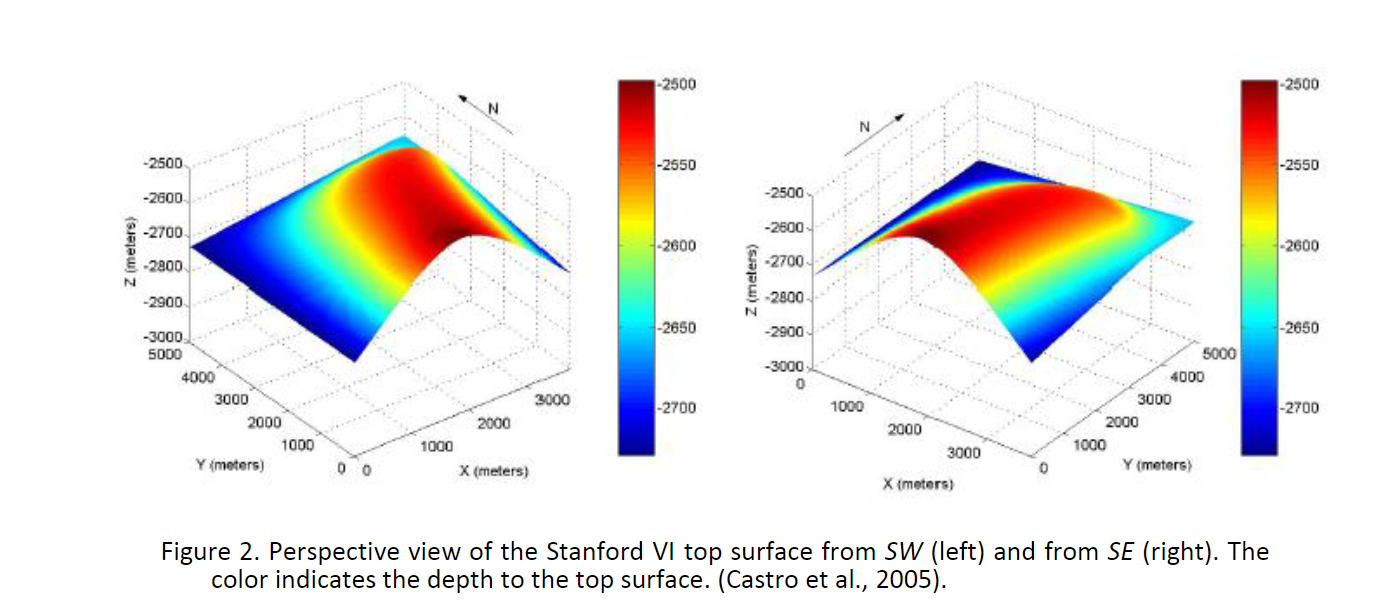

***
## 1. Setup

### 1.1 Create Virtual Enfironment

Please create a virtual environment before running this notebook. Here is how to do it:

```{terminal}
python -m venv venv
```

### 1.2 Import libraries
Please run the below code to setup your virtual env

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm


#Allows generated charts to be interactive
%matplotlib widget

## 2 Basic of the Database

Database contains multiple .dat files. For example P-wave Velocity for Year 1.

The problem though is that the way that the data is structured is a little tricky, the .dat files contain only a single column corresponding to that feature, while I was particularly expecting to be a column of X, Y and Z positions and then another column of the data at hand, like P-Wave.

### 2.1 Positional data

There is one .dat file that correspond to the Depth of the data, represented by "top.dat", which is shown below.

In [ ]:
with open("Top/top.dat", "r") as file:
    lines = [line.strip() for line in file.readlines()]
    lines = lines[3:]   #Remove 3 first lines as they are headers
    top = pd.DataFrame(lines)
    top.columns = ["depth"]
    top["depth"] = top["depth"].astype(float)
    
    print(len(top))
    print(top.head())

As it can be observed, the depth data contains 30000 rows, meaning that each cell represents the depth (z-axis), while there are 150 (x-axis) x 200 (y-axis) = 30000 rows. So we need to create the Y and X data, expecting that the dataset is filled in 150 depth values with constant y in each of 25m in x axis.

This can be confirmed by the below code that plots the first 150 values of the dataset. And we can clearly observer that is a similar (but inversed) line of the Y = 0 and 150 X

In [ ]:
plt.plot(top.iloc[:150])
plt.xlabel('X (meters)')
plt.ylabel('Z (meters)')
plt.show()

After confirming that indeed the positional dataset works like this, we can then finally create a clearer dataset containing X,Y,Z columns

In [ ]:
x_range = [25*x for x in range(150)]
y_range = [25*y for y in range(200)]

position = {"x":[],"y":[],"z":[]}

depth_counter = 0
for y in y_range:
    for x in x_range:
        position["x"].append(x)
        position["y"].append(y)
        position["z"].append(-top["depth"][depth_counter])      #inverting depth as it's considered a negative height
        depth_counter += 1
position = pd.DataFrame(position)

print(position.head())
print(position.tail())


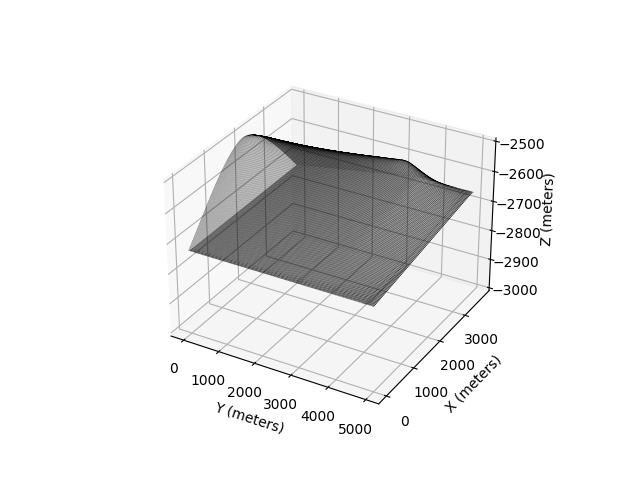

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z_axis = np.array([position["z"],position["z"]])
chart = ax.plot_surface(position["x"],position["y"],z_axis, edgecolors="black", linewidth=0.1)
#ax.plot_surface(position["x"],position["y"],z_axis,cmap=cm.coolwarm,linewidth=0, antialiased=False)

#fig.colorbar(chart, shrink=0.5, aspect=5)
ax.set_xlabel("X (meters)")
ax.set_ylabel("Y (meters)")
ax.set_zlabel("Z (meters)")
ax.set_zlim(-3000,-2500)

plt.show()

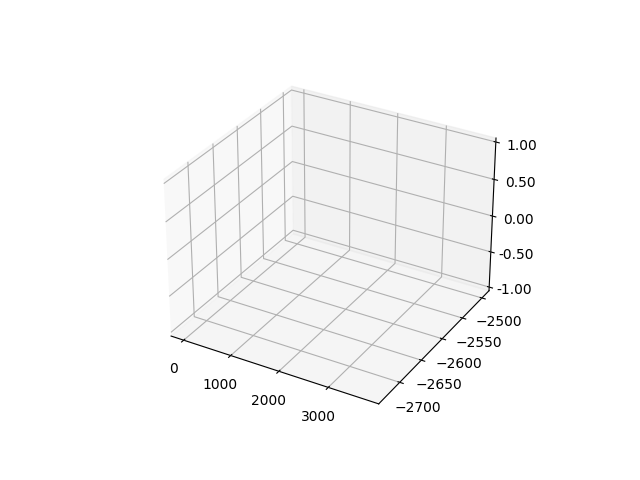

In [22]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = position["x"]
Y = position["z"]
#X, Y = np.meshgrid(x, y)
#R = np.sqrt(X**2 + Y**2)
Z = position["z"]
Z = np.array([position["z"],position["z"]])


# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0.1,edgecolors="black")

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()